In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
from sklearn import metrics, svm
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb


In [2]:
data=pd.read_csv(r'smoke_detection_iot.csv')

In [3]:
data = data.sample(n = 1500)
print(data.shape)
print("Number of Rows and Columns : ",data.shape)

len(data)


(1500, 16)
Number of Rows and Columns :  (1500, 16)


1500

# EDA

In [4]:
data.columns

Index(['Unnamed: 0', 'UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]',
       'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5',
       'NC0.5', 'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 12640 to 35579
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1500 non-null   int64  
 1   UTC             1500 non-null   int64  
 2   Temperature[C]  1500 non-null   float64
 3   Humidity[%]     1500 non-null   float64
 4   TVOC[ppb]       1500 non-null   int64  
 5   eCO2[ppm]       1500 non-null   int64  
 6   Raw H2          1500 non-null   int64  
 7   Raw Ethanol     1500 non-null   int64  
 8   Pressure[hPa]   1500 non-null   float64
 9   PM1.0           1500 non-null   float64
 10  PM2.5           1500 non-null   float64
 11  NC0.5           1500 non-null   float64
 12  NC1.0           1500 non-null   float64
 13  NC2.5           1500 non-null   float64
 14  CNT             1500 non-null   int64  
 15  Fire Alarm      1500 non-null   int64  
dtypes: float64(8), int64(8)
memory usage: 199.2 KB


In [6]:
try:
    df = data.drop(['Unnamed: 0','UTC'], axis=1, inplace=True)
    print("Successfully Deleted Columns")
except:
    print("Columns cannot be deleted")

Successfully Deleted Columns


In [7]:
data.head(5)
# data.tail()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
12640,20.447,51.63,1124,568,12823,19444,938.966,2.19,2.27,15.05,2.348,0.053,12640,1
41804,26.710,48.75,1109,400,12896,19450,938.766,1.44,1.50,9.92,1.547,0.035,16810,1
54760,25.190,44.84,0,400,13275,21185,937.429,1.80,1.87,12.40,1.934,0.044,3618,0
32821,20.780,50.62,289,400,13118,19974,939.427,0.45,0.47,3.09,0.482,0.011,7827,1
47472,24.850,51.94,1373,410,12959,19382,938.761,2.08,2.16,14.29,2.229,0.050,22478,1


In [8]:
# Checking Null Values
data.isna().sum()

Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [9]:
len(data)

1500

In [10]:
# Checking total counts
data['Fire Alarm'].value_counts()

Fire Alarm
1    1097
0     403
Name: count, dtype: int64

In [11]:
# Using Robust Scaler as preprocessing because it is robust to outliers.

data_scaled= RobustScaler()
print(data_scaled)

RobustScaler()


In [12]:
x=data.iloc[:,0:13]
x

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
12640,20.447,51.63,1124,568,12823,19444,938.966,2.19,2.27,15.05,2.348,0.053,12640
41804,26.710,48.75,1109,400,12896,19450,938.766,1.44,1.50,9.92,1.547,0.035,16810
54760,25.190,44.84,0,400,13275,21185,937.429,1.80,1.87,12.40,1.934,0.044,3618
32821,20.780,50.62,289,400,13118,19974,939.427,0.45,0.47,3.09,0.482,0.011,7827
47472,24.850,51.94,1373,410,12959,19382,938.761,2.08,2.16,14.29,2.229,0.050,22478
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11825,15.178,50.42,1009,589,12823,19472,939.070,2.12,2.20,14.57,2.272,0.051,11825
112,21.543,56.50,16,408,12536,19628,939.804,0.03,0.09,0.05,0.099,0.057,112
55803,50.560,14.25,627,400,13347,20520,936.837,0.97,1.01,6.68,1.042,0.024,4661
10798,4.094,53.37,981,664,12786,19483,939.061,2.22,2.30,15.26,2.380,0.054,10798


In [13]:
y=data.iloc[:,-1]
y

12640    1
41804    1
54760    0
32821    1
47472    1
        ..
11825    1
112      0
55803    0
10798    1
35579    1
Name: Fire Alarm, Length: 1500, dtype: int64

In [14]:
x_scaled=data_scaled.fit_transform(x)

In [15]:
xtrain, xtest, ytrain, ytest= train_test_split(x_scaled, y, test_size=0.25, random_state=101)

# SVM Modeling

In [16]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

In [17]:
#Train the model using the training sets
clf.fit(xtrain, ytrain)

SVC(kernel='linear')

In [18]:
#Predict the response for test dataset
y_pred = clf.predict(xtest)

In [19]:
print("Number of mislabeled points out of a total %d points : %d" % (xtest.shape[0], (ytest != y_pred).sum()))

Number of mislabeled points out of a total 375 points : 78


In [20]:
print("accuracy:", 1 - (ytest != y_pred).sum()/xtest.shape[0])
svm_accuracy = 1 - (ytest != y_pred).sum()/xtest.shape[0]

accuracy: 0.792


# SVM Confusion Matrix

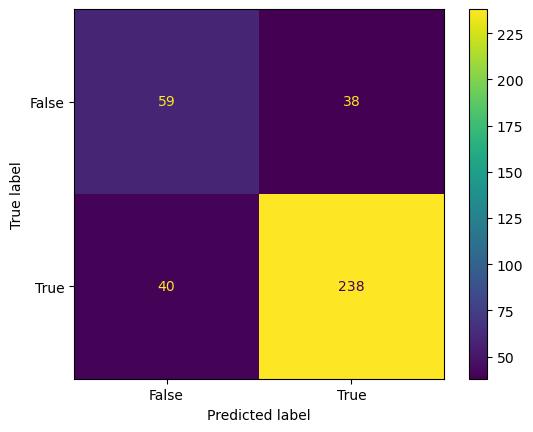

In [21]:
confusion_matrix = metrics.confusion_matrix(ytest, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

# KNN Modeling

In [22]:

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=7)

In [23]:
y_pred = knn.predict(xtest)

In [24]:
print("Number of mislabeled points out of a total %d points : %d" % (xtest.shape[0], (ytest != y_pred).sum()))

Number of mislabeled points out of a total 375 points : 2


In [25]:
print("accuracy:", 1 - (ytest != y_pred).sum()/xtest.shape[0])
knn_accuracy = 1 - (ytest != y_pred).sum()/xtest.shape[0]

accuracy: 0.9946666666666667


# KNN Confusion Matrix

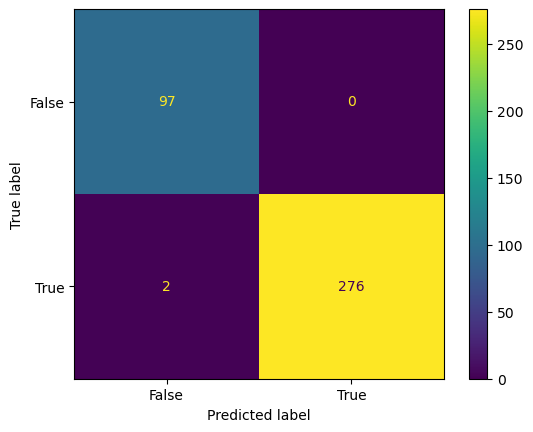

In [26]:
confusion_matrix = metrics.confusion_matrix(ytest, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

# Ensemble learning

# Adaboost Classifier

In [27]:

# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)

# Train Adaboost Classifer
model1 = abc.fit(xtrain, ytrain)


#Predict the response for test dataset
y_pred = model1.predict(xtest)

In [28]:

# calculate and print model accuracy
print("AdaBoost Classifier Model Accuracy:", accuracy_score(ytest, y_pred))
adaboost_accuracy = accuracy_score(ytest, y_pred)

AdaBoost Classifier Model Accuracy: 0.9946666666666667


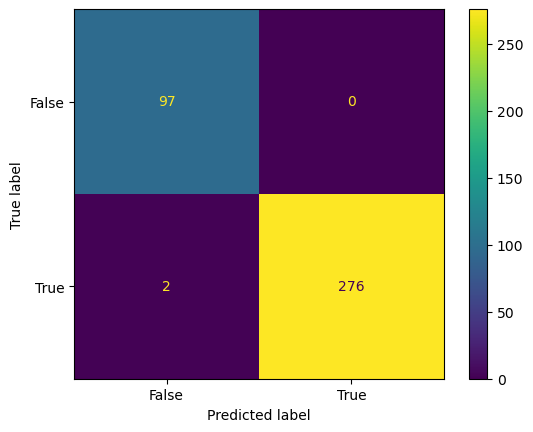

In [29]:
confusion_matrix = metrics.confusion_matrix(ytest, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

# XGBoost Classifier

In [30]:
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)

In [31]:

# calculate and print model accuracy
print("AdaBoost Classifier Model Accuracy:", accuracy_score(ytest, y_pred))
xgboost_accuracy = accuracy_score(ytest, y_pred)

AdaBoost Classifier Model Accuracy: 0.992


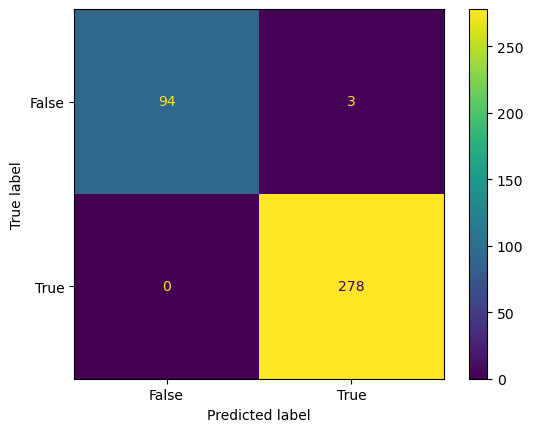

In [32]:
confusion_matrix = metrics.confusion_matrix(ytest, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [34]:
try:
    df = data.drop(['CNT','PM1.0','PM2.5','NC0.5','NC1.0','NC2.5'], axis=1, inplace=True)
    print("Successfully Deleted Columns")
except:
    print("Columns cannot be deleted")

Successfully Deleted Columns


C:\Users\lenovo t470\AppData\Local\Temp\ipykernel_12900\691283018.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax=ax)


array([[<Axes: title={'center': 'Temperature[C]'}>,
        <Axes: title={'center': 'Humidity[%]'}>,
        <Axes: title={'center': 'TVOC[ppb]'}>],
       [<Axes: title={'center': 'eCO2[ppm]'}>,
        <Axes: title={'center': 'Raw H2'}>,
        <Axes: title={'center': 'Raw Ethanol'}>],
       [<Axes: title={'center': 'Pressure[hPa]'}>,
        <Axes: title={'center': 'Fire Alarm'}>, <Axes: >]], dtype=object)

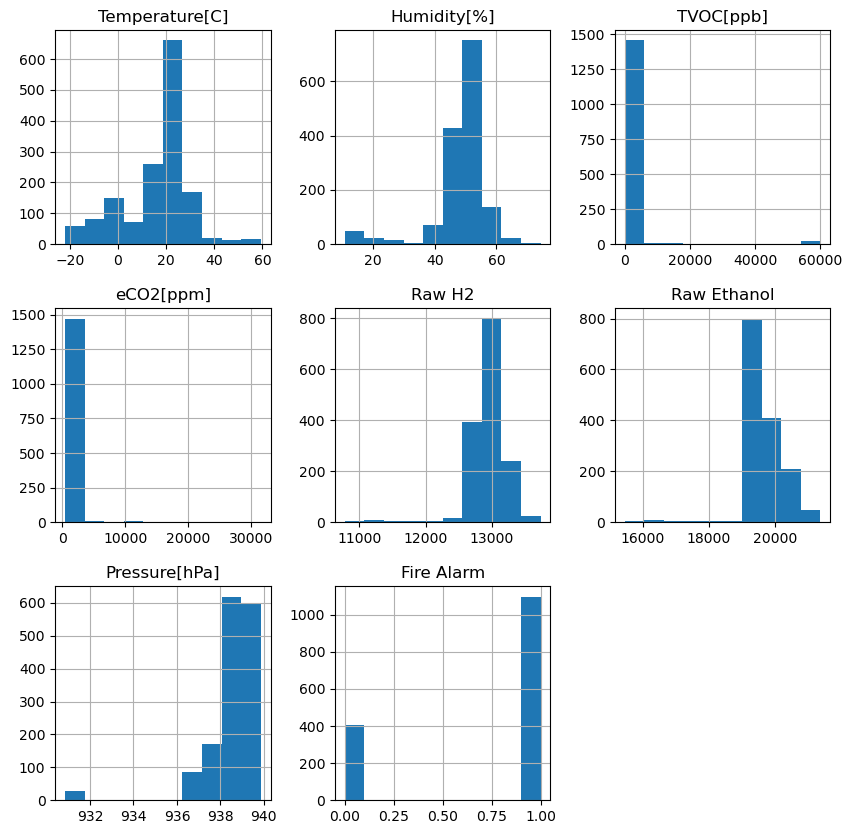

In [35]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
data.hist(ax=ax)

<Axes: >

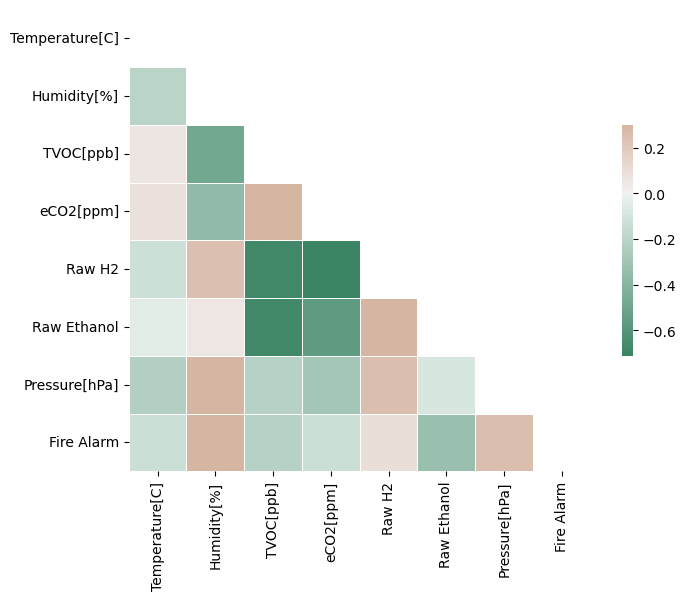

In [36]:
#Co relation for Random Forest
corr2 = data.corr()

mask = np.triu(np.ones_like(corr2, dtype=bool))
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(150, 30, as_cmap=True)
sns.heatmap(corr2, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Splitting the feature and Target

In [37]:
dfy = data.pop('Fire Alarm')
dfy = pd.DataFrame(dfy, columns=['Fire Alarm'])


# Split train and val dataset for random Forest

In [38]:
VER = '002'
NUM_STATE = 41
xtrain, xval, ytrain, ytest = train_test_split(data, dfy, test_size=0.2, shuffle=True, random_state=NUM_STATE, stratify=dfy)


# Scale data using StandardScaler

In [39]:
sc = StandardScaler()
sc.fit(xtrain)
xtrainsc = sc.transform(xtrain)
xtest = sc.transform(xval)

# Train model using Random Forest

d:\Anaconda\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Accuracy  0.9866666666666667


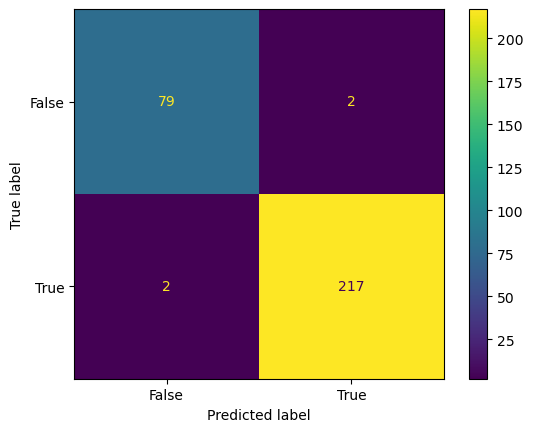

In [40]:
rf = RandomForestClassifier()
rf.fit(xtrainsc, ytrain)

# Running the prediction
ypred = rf.predict(xtest)


print("Random Forest Accuracy ",accuracy_score(ytest, ypred))
rf_accuracy = accuracy_score(ytest, ypred)

confusion_matrix = metrics.confusion_matrix(ytest, ypred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()


In [41]:
print("Classification Report ",classification_report(ytest, ypred))


Classification Report                precision    recall  f1-score   support

           0       0.98      0.98      0.98        81
           1       0.99      0.99      0.99       219

    accuracy                           0.99       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.99      0.99      0.99       300



['./standardscaler.joblib']

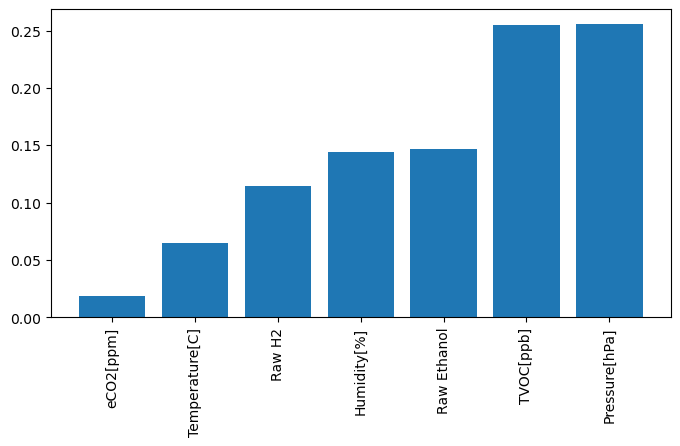

In [42]:
# feature Importance

sorted_idx = rf.feature_importances_.argsort()
rf.feature_importances_[sorted_idx]

plt.figure(figsize=(8,4))
plt.xticks(rotation = 90)
plt.bar(xtrain.columns[sorted_idx], rf.feature_importances_[sorted_idx])

joblib.dump(rf, './smoke-detection-rf.joblib')

joblib.dump(sc, './standardscaler.joblib')


In [43]:
print("KNN Accuracy: " + str(knn_accuracy))
print("SVM Accuracy: " + str(svm_accuracy))
print("AdaBoost Accuracy: " + str(adaboost_accuracy))
print("XGBoost Accuracy: " + str(xgboost_accuracy))
print("Random Forest Accuracy ",str(rf_accuracy))


KNN Accuracy: 0.9946666666666667
SVM Accuracy: 0.792
AdaBoost Accuracy: 0.9946666666666667
XGBoost Accuracy: 0.992
Random Forest Accuracy  0.9866666666666667
